# Exercise 5.9 Additive Random Walk

Below is my code where I tried implementing additive random walk.

Final MC R =  [1.68552344 1.8563285 ]
Acceptance rate =  [0.0017 0.0018]


Text(0.5, 1.0, 'ARW radius vs itteration')

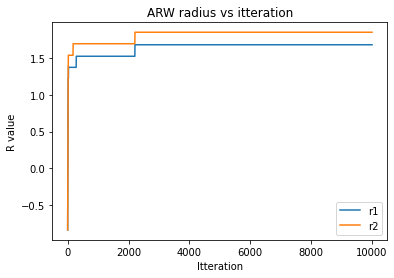

In [27]:
import numpy as np #Importing library for mathematical calculations
import matplotlib.pyplot as plt #Plotting library

def pi(r): #Density as given in question
    r1,r2=r; #Radius is given in array form [r1,r2]
    return np.exp(-10*np.power(r1*r1-r2,2)-np.power(r2-0.25,4));

def normal2(r,m1,m2): #Defining Normal2
    if (m2[0][1]!=m2[1][0]): #Off diagonal elements should be equal.
        print("Off diagonal elements are unequal.");
        exit();
    #Defining all the parameters of Normal2
    mu1 = m1[0];
    mu2 = m1[1];
    v1 = m2[0][0];
    v2 = m2[1][1];
    rho = m2[0][1]*1.0/np.sqrt(v1*v2);
    r1 = r[0];
    r2 = r[1];
    return np.exp((-1.0/(2.0*(1.0-rho*rho)))*(np.square(r1-mu1)/v1+np.square(r2-mu2)/v2-2*(r1-mu1)*(r2-mu2)/np.sqrt(v1*v2)))/(2*np.pi*np.sqrt(v1*v2*(1-rho*rho)))
    
#Initilizing the Parameters
lam = 1; #Scaling
rold = np.array([-1,-1],dtype=float) #Initial R
#Normal2 elements
m1 = np.array([0,0],dtype=float);
m2 = np.array([[1,0],
               [0,1]])
itter = 10000; #Itteration steps 10^4
piNew = 0.0; #Initilizing for storage of new Pi value
accept=np.array([0,0],dtype=int); #To store acceptance ratio
samples = np.zeros((itter,2),dtype=float) #Store the sample drawn
success=True;

for i in range(itter): #Itterating over 10^4
    rand = np.random.uniform(); #Generating random number from uniform distribution.
    if success==True:
        epsilon = lam*normal2(rold,m1,m2); #additive facttor = lambda*normal2
    else:
        epsilon = -lam*normal2(rold,m1,m2);
    rnew = rold + epsilon; #rprop = rold + epsilon_prop
    #Using Gibbs Sampler
    #Acceptance Ratio = Pi(r_prop)/Pi(r_old)
    alpha1 = pi([rnew[0],rold[1]])/pi(rold); # r1new|r2old
    alpha2 = pi(rnew)/pi(rold); # r2new|r1new
    if rand < alpha1: #Check for the acceptance ratio of radius r1
        rold[0] = rnew[0]; #if A > random then r1_old = r1_new
        accept[0]+=1; #count the accepted instance

    if rand < alpha2: # Checking if Acceptance ratio is larger than random
        rold[1] = rnew[1]; #if satisfied r2_old = r2_new
        accept[1]+=1; #Count the accepted instance for r2
    
    samples[i]=rold

print("Final MC R = ",rold); #Final r1 and r2 results
print("Acceptance rate = ",accept/itter) # Acceptance rate [r1,r2]

# plt.figure(figsize=(8,8))
plt.plot(np.linspace(1,itter,itter),samples[:,0],label="r1");#Plotting r1
plt.plot(np.linspace(1,itter,itter),samples[:,1],label="r2"); #Plotting r2
plt.xlabel("Itteration") #X-axis label
plt.ylabel("R value") #Y-axis label
plt.legend() #Output legend
plt.title("ARW radius vs itteration") #Title of the plot
# plt.savefig("l1arw.png",dpi=100) #Saving the plot

### Validation of the above result

To check if the above result is correct or wrong, I implemented same algorithm as above but instead of additive metropolis sampler I drew my r_proposal from random normal2 distribution. This clearly indicates the above implementation is not accurate.

### Sample Result from Additive Random walk (ARW) and Normal Random Walk (NRW)

| $\lambda$ | ARW r1     | ARW r2     | NRW r1     | NRW r2    |
|-----------|------------|------------|------------|-----------|
|0.01       | 2.64493153 | 2.89712833 |0.01956485  |-0.10743575|
|1          | 1.67836977 | 1.99272312 |0.04066349  |0.40388104 |
|100        | -1         | -1         |-1          |-1         |

The trend of the $\lambda$ is very evident from the above table:

- For a very large value of $\lambda$ = 100, none of the algorithm converges, it just outputs the initial guess.

![l100arw](l100arw.png)
![](l100nrw.png)

- For a very small $\lambda$ =0.01, the ARW algorithm converges to a point seemingly far from the true value and both r1 and r2 converges to exactly same value. For NRW the $\lambda$ value was too small to sample most of the space.
![](l01arw.png)
![](l01nrw.png)

- For a $\lambda$ =1 we observe different convergence for r1 and r2 in both ARW and NRW. Thus a proper value of lambda is necessary for convergence in Metropolis Random Walk Problem.

![](l1arw.png)
![](l1nrw.png)


Acceptance rate: 0.165
MC estimates: [0.04066349 0.40388104]


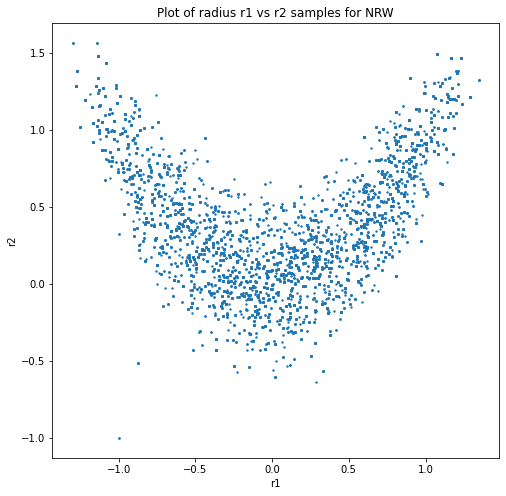

In [14]:
import numpy as np #Mathematical calculation library
import matplotlib.pyplot as plt #Plotting library

# Define the target distribution pi
def pi(r):
    return np.exp(-10*(r[0]**2 - r[1])**2 - (r[1] - 0.25)**4)

# Number of iterations 10^4
n_iter = 10000

# Setting an equivalent of lambda as scale
scale = 1

# Initial r value
r_current = [-1,-1]

# Initialize the acceptance counter
accept_counter = 0

# Initialize the samples matrix
samples = np.zeros((n_iter, 2))

# Implement the Metropolis algorithm
for i in range(n_iter):
    # Generating r_proposal from random Normal2 distribution defined by Numpy library  
    r_proposal = np.random.normal(r_current, scale, size=2)
    
    # Compute the acceptance probability
    alpha = pi(r_proposal)/pi(r_current)
    
    # Decide whether to accept the proposal
    if np.random.uniform() < alpha:
        r_current = r_proposal
        accept_counter += 1
    
    # Record the sample
    samples[i,:] = r_current

# Compute the acceptance rate
accept_rate = accept_counter/n_iter

# Print the acceptance rate
print("Acceptance rate:", accept_rate)

# Compute the Monte Carlo estimates
mc_estimate = np.mean(samples, axis=0)

# Print the Monte Carlo estimates
print("MC estimates:", mc_estimate)

# Plot the samples
plt.figure(figsize=(8,8))
plt.scatter(samples[:,0], samples[:,1], s=2)
plt.title("Plot of radius r1 vs r2 samples for NRW");
plt.xlabel("r1");
plt.ylabel("r2");
# plt.savefig("l1nrw.png",dpi=100)

# Exercise 5.7 Gibbs sampler for mixture models

In [34]:
import numpy as np
from scipy.stats import norm, beta

# Set the hyperparameters of the Beta prior on pi1
a = 1
b = 1

# Set the prior mean and precision of mu1 and mu2
mu01 = 0
mu02 = 0
k1 = 1
k2 = 1

# Generate some toy data from a mixture of two Normal distributions
pi1_true = 0.6
mu1_true = 2
mu2_true = -2
tau_true = 1
N = 100
s = np.random.binomial(1, pi1_true, size=N)
w = s * np.random.normal(mu1_true, np.sqrt(1/tau_true), size=N) + (1-s) * np.random.normal(mu2_true, np.sqrt(1/tau_true), size=N)

# Initialize the variables
pi1 = np.random.beta(a, b)
mu1 = np.random.normal(mu01, np.sqrt(1/k1))
mu2 = np.random.normal(mu02, np.sqrt(1/k2))
tau = np.random.gamma(1, 1)
s = np.random.binomial(1, pi1, size=N)
posterior_samples=[]

# Set the number of iterations and burn-in period
num_iters = 1000
burn_in = 100

# Run the Gibbs sampler
for i in range(num_iters):
    # Update the latent variables s1:N
    for j in range(N):
        p1 = pi1 * norm.pdf(w[j], mu1, np.sqrt(1/tau))
        p2 = (1-pi1) * norm.pdf(w[j], mu2, np.sqrt(1/tau))
        s[j] = np.random.binomial(1, p1 / (p1+p2))
    
    # Update the mixing proportion pi1
    N1 = np.sum(s)
    N2 = N - N1
    pi1 = np.random.beta(a + N1, b + N2)
    
    # Update the mean mu1
    x1 = np.mean(w[s==1])
    v1 = 1 / (N1*tau + k1)
    m1 = v1 * (N1*tau*x1 + k1*mu01)
    mu1 = np.random.normal(m1, np.sqrt(v1))
    
    # Update the mean mu2
    x2 = np.mean(w[s==0])
    v2 = 1 / (N2*tau + k2)
    m2 = v2 * (N2*tau*x2 + k2*mu02)
    mu2 = np.random.normal(m2, np.sqrt(v2))
    
    # Update the precision tau
    ss1 = np.sum(s*(w-mu1)**2)
    ss2 = np.sum((1-s)*(w-mu2)**2)
    a_tau = 0.5*(N1+N2) + 1
    b_tau = 0.5*(ss1+ss2) + 1
    tau = np.random.gamma(a_tau, 1/b_tau)
    
    # Save the posterior samples after the burn-in period
    if i > burn_in:
        posterior_samples.append((s, pi1, mu1, mu2, tau))


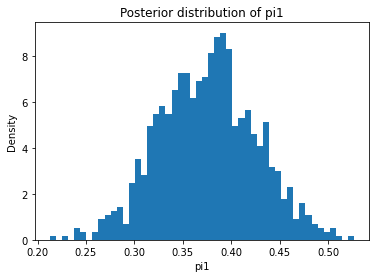

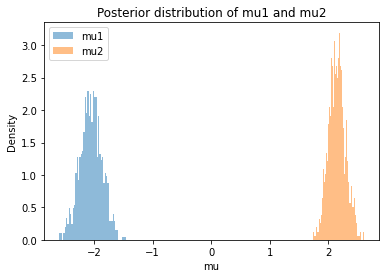

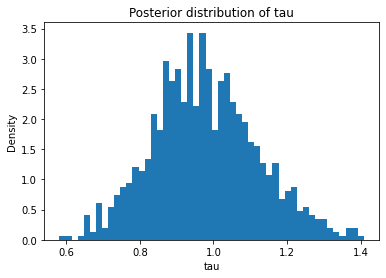

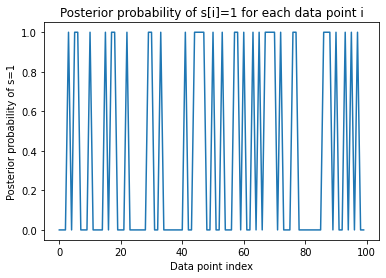

In [35]:
import matplotlib.pyplot as plt

# Extract the posterior samples for the variables of interest
s_samples = np.array([sample[0] for sample in posterior_samples])
pi1_samples = np.array([sample[1] for sample in posterior_samples])
mu1_samples = np.array([sample[2] for sample in posterior_samples])
mu2_samples = np.array([sample[3] for sample in posterior_samples])
tau_samples = np.array([sample[4] for sample in posterior_samples])

# Plot the posterior distribution of pi1
plt.hist(pi1_samples, bins=50, density=True)
plt.xlabel('pi1')
plt.ylabel('Density')
plt.title('Posterior distribution of pi1')
plt.show()

# Plot the posterior distribution of mu1 and mu2
plt.hist(mu1_samples, bins=50, density=True, alpha=0.5, label='mu1')
plt.hist(mu2_samples, bins=50, density=True, alpha=0.5, label='mu2')
plt.xlabel('mu')
plt.ylabel('Density')
plt.title('Posterior distribution of mu1 and mu2')
plt.legend()
plt.show()

# Plot the posterior distribution of tau
plt.hist(tau_samples, bins=50, density=True)
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('Posterior distribution of tau')
plt.show()

# Plot the posterior probability of s[i]=1 for each data point i
plt.plot(np.mean(s_samples, axis=0))
plt.xlabel('Data point index')
plt.ylabel('Posterior probability of s=1')
plt.title('Posterior probability of s[i]=1 for each data point i')
plt.show()